In [1]:
# PyCaret - データの前処理自動化,モデル(アルゴリズム)の比較自動化,チューニングの自動化などをおこなってくれる
# 超便利最強ライブラリであり、scikit-learn,XGBoost,LightGBM,Optunaなどのいくつかの機械学習ライブラリとフレームワークをまとめたPythonラッパー
# 全ての処理を数行でできる
# 引数で詳細が設定する

# PyCaretのインストール
!pip install pycaret

     |████████████████████████████████| 288 kB 25.5 MB/s 
     |████████████████████████████████| 167 kB 66.6 MB/s 
     |████████████████████████████████| 1.7 MB 72.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 4.8 MB/s 
     |████████████████████████████████| 15.5 MB 38.4 MB/s 
     |████████████████████████████████| 2.0 MB 38.0 MB/s 
     |████████████████████████████████| 261 kB 54.5 MB/s 
     |████████████████████████████████| 6.8 MB 44.2 MB/s 
     |████████████████████████████████| 1.3 MB 59.4 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 114 kB 59.2 MB/s 
     |████████████████████████████████| 3.1 MB 49.8 MB/s 
     |████████████████████████████████| 303 kB 61.3 MB/s 
     |████████████████████████████████| 596 kB 82.4 MB/s 
     |████████████████

In [3]:
# ダイヤモンドの価格を予測する
from pycaret.regression import * #価格を予想するので回帰(regression),分類はfrom pycaret.classification(分類)
from pycaret.datasets import get_data #get_dataに引数を用いることでさまさまデータを持ってくることが可能

In [5]:
dataset = get_data("diamond")

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [6]:
# データの前処理(データの準備)
# setup(どのデータを使うか,目的変数が何になるのか)
exp = setup(dataset,target="Price") #datasetのPriceを目標値にとって環境を整える
# 　setupするだけで、PyCaretを実装するための準備、基盤を準備してくれ、かつデータの前処理を行なってくれている

,Description,Value
0,session_id,6463
1,Target,Price
2,Original Data,"(6000, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4199, 28)"


In [7]:
#モデリング（手法(アルゴリズム)の比較）
compare_models()
# たった１行でさまざまな指標でアルゴリズムが評価される
# r2決定係数が固い順に並べられる
# 今回の手法 - Extra Trees Regressor(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,7.292267e+02,1.941615e+06,1.382663e+03,9.806000e-01,0.0792,0.0594,1.431
rf,Random Forest Regressor,7.286588e+02,2.249711e+06,1.473980e+03,9.780000e-01,0.0788,0.0583,1.345
lightgbm,Light Gradient Boosting Machine,7.206857e+02,2.778127e+06,1.595471e+03,9.733000e-01,0.0761,0.0557,0.118
gbr,Gradient Boosting Regressor,9.101086e+02,3.257971e+06,1.778250e+03,9.681000e-01,0.1011,0.0767,0.300
dt,Decision Tree Regressor,9.326457e+02,3.331466e+06,1.813218e+03,9.665000e-01,0.1017,0.0747,0.034
ridge,Ridge Regression,2.410222e+03,1.360966e+07,3.674617e+03,8.642000e-01,0.6483,0.2821,0.016
lr,Linear Regression,2.405905e+03,1.361864e+07,3.678595e+03,8.636000e-01,0.6434,0.2816,0.332
lasso,Lasso Regression,2.404163e+03,1.362863e+07,3.679533e+03,8.636000e-01,0.6391,0.2810,0.038
br,Bayesian Ridge,2.407749e+03,1.364623e+07,3.681779e+03,8.634000e-01,0.6424,0.2817,0.020
llar,Lasso Least Angle Regression,2.347814e+03,1.367171e+07,3.684334e+03,8.633000e-01,0.6353,0.2669,0.018


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=6463, verbose=0, warm_start=False)

In [9]:
# たった１行で交差検証(cross validation)を自動で行ってくれる
model = create_model("et") #("et") - 今回使用するモデル
print(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,790.6313,1.925239e+06,1387.5299,0.9794,0.0855,0.0646
1,689.4956,1.452403e+06,1205.1568,0.9849,0.0741,0.0559
2,772.2871,2.088035e+06,1445.0033,0.9780,0.0819,0.0623
3,794.5421,3.185471e+06,1784.7888,0.9759,0.0775,0.0587
4,748.2241,1.947456e+06,1395.5128,0.9798,0.0862,0.0617
5,658.8899,1.290640e+06,1136.0633,0.9850,0.0773,0.0589
6,761.1347,2.341377e+06,1530.1558,0.9758,0.0825,0.0603
7,674.2109,1.876052e+06,1369.6906,0.9826,0.0769,0.0555
8,721.5395,1.654515e+06,1286.2793,0.9861,0.0734,0.0570
9,681.3114,1.654958e+06,1286.4517,0.9788,0.0771,0.0589


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=6463, verbose=0, warm_start=False)


In [10]:
# ハイパーパラメータチューニング
tuned_model = tune_model(model) #(model) - 先ほど定義したモデルを入れてあげる
# これだけでハイパーパラメータチューニングできた

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,794.0514,1.826809e+06,1351.5950,0.9804,0.0850,0.0637
1,757.6718,1.779785e+06,1334.0857,0.9815,0.0800,0.0608
2,737.0381,1.847412e+06,1359.1955,0.9805,0.0825,0.0603
3,852.4933,5.826693e+06,2413.8543,0.9558,0.0838,0.0597
4,700.7536,1.722441e+06,1312.4181,0.9821,0.0823,0.0577
5,689.4677,1.453852e+06,1205.7578,0.9831,0.0739,0.0580
6,791.2182,2.567533e+06,1602.3522,0.9734,0.0849,0.0616
7,708.2312,3.940691e+06,1985.1173,0.9635,0.0838,0.0580
8,752.1652,1.760527e+06,1326.8486,0.9852,0.0764,0.0592
9,683.9989,1.648174e+06,1283.8122,0.9789,0.0765,0.0592


In [11]:
# 学習済みモデルで予測結果を見る
predict_model(tuned_model) #predict_model(予測したいもの)
# price(実際の値)とLabel(予測値)で比較する

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,818.4819,3.693600e+06,1921.8741,0.9669,0.0839,0.0613


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_FL,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,1.04,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,6669,7204.648148
1,1.11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10053,9414.079630
2,1.01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,7566,8052.527778
3,1.01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6734,6612.035185
4,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4557,4923.840741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,2.11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,16026,17134.124074
1797,2.20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,28195,25573.644444
1798,1.12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,7971,7804.603704
1799,0.90,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3770,3624.720370


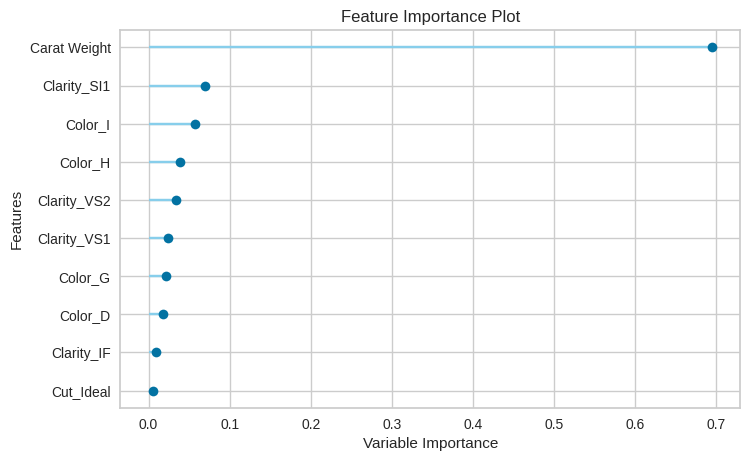

In [15]:
# 結果のプロット
plot_model(tuned_model) #plot_model(plot(平面図)したいもの)

# 特徴量の重要度を見たい場合
plot_model(tuned_model,plot="feature")